In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings


# Visualizations Libraries
import plotly.express as px
import missingno as msno

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.utils import shuffle, resample
from xgboost import XGBClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold

In [ ]:
colors_primary = ['#01411C', '#4B6F44', '#4F7942', '#101144', '#D0F0C0']
colors_secondary = ["#132C33", "#264D58", '#17869E', '#6f85ff', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']

binsize=40
opacity=0.8

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AakarshShreshth/AI_ML_Lab/main/water_potability.csv')

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

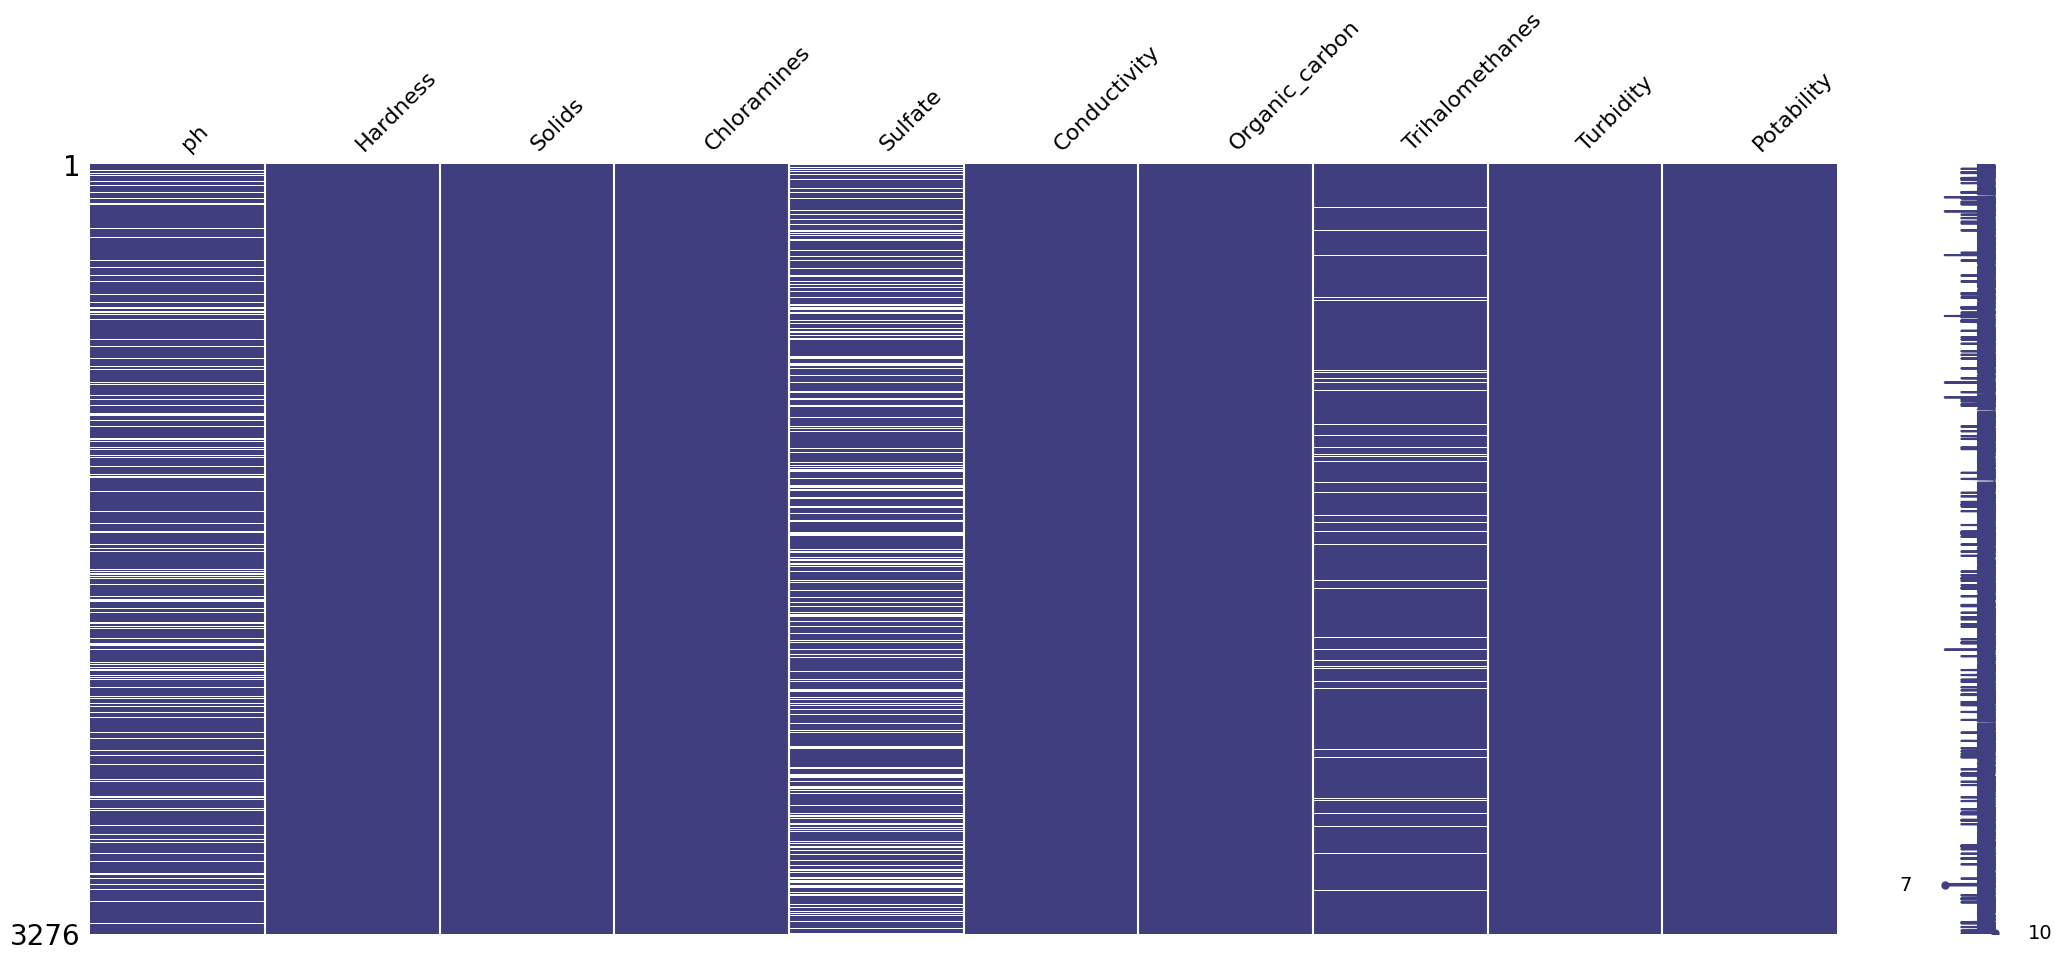

In [ ]:
fig = msno.matrix(df,color=(0.25,0.25,0.5))

In [ ]:
d = pd.DataFrame(df['Potability'].value_counts())
fig = px.pie(d,values='count',names=['Not Potable','Potable'],hole=0.4,opacity=0.8,
            color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
            labels={'count':'Number of Samples'})

fig.add_annotation(text='Potability',x=0.5,y=0.5,showarrow=False,
                   font_size=14,opacity=opacity,font_family='arial')
fig.update_layout(
    font_family='arial',
    title=dict(text='Potability Distribution (Before Resampling)',x=0.5,y=0.96,
    font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.38,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

In [ ]:
df = df.dropna()
notpotable  = df[df['Potability']==0]
potable = df[df['Potability']==1]

df_minority_upsampled = resample(potable, replace = True, n_samples = 1200)
df = pd.concat([notpotable, df_minority_upsampled])
df = shuffle(df)

In [ ]:
d = pd.DataFrame(df['Potability'].value_counts())
fig = px.pie(d,values='count',names=['Not Potable','Potable'],hole=0.4,opacity=0.8,
            color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
            labels={'count':'Number of Samples'})

fig.add_annotation(text='Potability',x=0.5,y=0.5,showarrow=False,
                   font_size=14,opacity=opacity,font_family='arial')
fig.update_layout(
    font_family='arial',
    title=dict(text='Potability Distribution (After Resampling)',x=0.5,y=0.96,
    font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.38,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

In [ ]:
fig = px.histogram(df, x='Hardness', color='Potability', template='plotly_white',
                   marginal='box', opacity=opacity, nbins=binsize, color_discrete_sequence=[colors_primary[3], colors_secondary[3]],
                   barmode='group', histfunc='count')

fig.add_annotation(text='<76 mg/L is<br> considered soft',
                   x=40, y=130, showarrow=False, font_size=9)
fig.add_annotation(text='Between 76 and 150<br> (mg/L) is<br>moderately hard',
                   x=113, y=130, showarrow=False, font_size=9)
fig.add_annotation(text='Between 151 and 300 (mg/L)<br> is considered hard',
                   x=250, y=130, showarrow=False, font_size=9)
fig.add_annotation(text='>300 mg/L is<br> considered very hard',
                   x=340, y=130, showarrow=False, font_size=9)
fig.update_layout(
    font_family='arial',
    title=dict(text='Hardness Distribution', x=0.50, y=0.95,
               font=dict(color=colors_dark[2], size=20)),
    xaxis_title_text='Hardness (mg/L)',
    yaxis_title_text='Count',
    legend=dict(
        x=1, y=0.96, bordercolor=colors_dark[4], borderwidth=0, tracegroupgap=5, traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()


In [ ]:
fig = px.histogram(df,x='ph',color='Potability',template='plotly_white',
                  marginal='box',opacity=opacity,nbins=binsize,color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='<7 is Acidic',x=4,y=70,showarrow=False,font_size=10)
fig.add_annotation(text='>7 is Basic',x=10,y=70,showarrow=False,font_size=10)
fig.update_layout(
    font_family='arial',
    title=dict(text='pH Level Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='pH Level',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5, traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()

In [ ]:
fig = px.histogram(df,x='Solids',color='Potability',template='plotly_white',
                  marginal='box',opacity=opacity,nbins=binsize,color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='arial',
    title=dict(text='Distribution Of Total Dissolved Solids',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Dissolved Solids (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5, traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()

In [ ]:
fig = px.histogram(df,x='Chloramines',color='Potability',template='plotly_white',
                  marginal='box',opacity=opacity,nbins=binsize,color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='<4 ppm is considered<br> safe for drinking',x=1.8,y=90,showarrow=False)
fig.update_layout(
    font_family='arial',
    title=dict(text='Chloramines Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Chloramines (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5,traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()

In [ ]:
fig = px.histogram(df,x='Sulfate',color='Potability',template='plotly_white',
                  marginal='box',opacity=opacity,nbins=binsize,color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='<250 mg/L is considered<br> safe for drinking',x=175,y=90,showarrow=False)
fig.update_layout(
    font_family='arial',
    title=dict(text='Sulfate Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Sulfate (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5,traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()

In [ ]:
fig = px.histogram(df,x='Conductivity',color='Potability',template='plotly_white',
                  marginal='box',opacity=opacity,nbins=binsize,color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='The Conductivity range <br> is safe for both (200-800),<br> Potable and Non-Potable water',
                   x=600,y=90,showarrow=False)
fig.update_layout(
    font_family='arial',
    title=dict(text='Conductivity Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Conductivity (μS/cm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5,traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()

In [ ]:
fig = px.histogram(df,x='Organic_carbon',color='Potability',template='plotly_white',
                  marginal='box',opacity=opacity,nbins=binsize,color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='Typical Organic Carbon<br> level is upto 10 ppm',x=5.3,y=110,showarrow=False)
fig.update_layout(
    font_family='arial',
    title=dict(text='Organic Carbon Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Organic Carbon (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5,traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()

In [ ]:
fig = px.histogram(df,x='Trihalomethanes',color='Potability',template='plotly_white',
                  marginal='box',opacity=opacity,nbins=binsize,color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='Upper limit of Trihalomethanes<br> level is 80 μg/L',x=115,y=90,showarrow=False)
fig.update_layout(
    font_family='arial',
    title=dict(text='Trihalomethanes Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Trihalomethanes (μg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5,traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()

In [ ]:
fig = px.histogram(df,x='Turbidity',color='Potability',template='plotly_white',
                  marginal='box',opacity=opacity,nbins=binsize,color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='<5 NTU Turbidity is<br> considered safe',x=6,y=90,showarrow=False)
fig.update_layout(
    font_family='arial',
    title=dict(text='Turbidity Distribution',x=0.5,y=0.95,
    font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Turbidity (NTU)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5,traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()

In [ ]:
fig = px.scatter_matrix(df,df.drop('Potability',axis=1),height=1250,width=1250,template='plotly_white',opacity=opacity,
                        color_discrete_sequence=[colors_secondary[3],colors_primary[3]],color='Potability',
                        symbol='Potability',color_continuous_scale=[colors_primary[3],colors_secondary[3]])

fig.update_layout(font_family='arial',font_size=10,
                  coloraxis_showscale=False,
                  legend=dict(x=0.02,y=1.07,bgcolor=colors_dark[4],traceorder='reversed'),
                  title=dict(text='Scatter Plot matrix between features',x=0.5,y=0.97,
                  font=dict(color=colors_dark[2],size=24)))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))
fig.show()

In [ ]:
features_to_normalize = df.drop(['Potability'], axis=1)
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features_to_normalize)
normalized_df = pd.DataFrame(normalized_features, columns=features_to_normalize.columns)
df.reset_index(drop=True, inplace=True)
normalized_df['Potability'] = df['Potability']
df = normalized_df
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,0.348491,0.689144,0.176517,0.445111,0.428545,0.443507,0.482227,0.415430,1
1,0.503289,0.387947,0.449918,0.749707,0.686530,0.221411,0.534043,0.382325,0.563292,1
2,0.526704,0.638310,0.209506,0.296502,0.800762,0.567299,0.601489,0.431877,0.557424,1
3,0.656677,0.884166,0.686612,0.567063,0.331146,0.541961,0.555538,0.482203,0.416197,1
4,0.379683,0.643860,0.367594,0.463178,0.650524,0.187286,0.476858,0.442119,0.465726,1
...,...,...,...,...,...,...,...,...,...,...
2395,0.485965,0.541565,0.693107,0.605218,0.542045,0.510448,0.503809,0.297674,0.604355,1
2396,0.460450,0.596292,0.512799,0.457923,0.571726,0.180042,0.409578,0.512980,0.546053,1
2397,0.492963,0.413888,0.315022,0.384470,0.671933,0.480946,0.342350,0.326819,0.525576,0
2398,0.694649,0.248583,0.362518,0.681653,0.468954,0.399255,0.389138,0.629273,0.296431,1


In [ ]:
corr = df.corr()
corr["Potability"].sort_values(ascending=False)

Potability         1.000000
Solids             0.053436
ph                 0.028271
Turbidity          0.028191
Chloramines        0.016494
Trihalomethanes   -0.010214
Hardness          -0.013348
Conductivity      -0.014836
Organic_carbon    -0.026202
Sulfate           -0.035660
Name: Potability, dtype: float64

In [ ]:
fig = px.imshow(corr,height=1200,width=1200,template='plotly_white',text_auto=True)
fig.update_layout(font_family='arial',
                title=dict(text='Correlation Heatmap',x=0.5,y=0.93,
                font=dict(color=colors_dark[2],size=24)),
                coloraxis_colorbar=dict(len=0.85,x=1.1))
fig.show()

In [ ]:
x = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1)

In [ ]:
### TYPE 1

In [ ]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)


para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#Decision Tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#AdaBoost
params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

In [ ]:
grid_knn.fit(X_train, Y_train)
grid_dt.fit(X_train, Y_train)
grid_rf.fit(X_train, Y_train)
grid_ada.fit(X_train, Y_train)
rs_xgb.fit(X_train, Y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for KNN: {'n_neighbors': 1}
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 44, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}
Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 600}
Best parameters for XGBoost: {'n_estimators': 100, 'learning_rate': 0.5}


In [ ]:
models = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
          ('XGBoost', xgb)]


for model_name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    print('{:s} : {:.6f}'.format(model_name, accuracy))

K Nearest Neighbours : 0.741667
Decision Tree : 0.775000
Random Forest : 0.854167
AdaBoost : 0.662500
XGBoost : 0.833333


In [ ]:
### TYPE 2

In [ ]:
filterwarnings('ignore')
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),("NuSVC", NuSVC()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),('XGB',GradientBoostingClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, Y_train)
    model_results = model.predict(X_test)
    score = precision_score(Y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))

finalResults.sort(key=lambda k:k[1],reverse=True)

In [ ]:
finalResults

[('RF', 0.9289488320355951),
 ('DTC', 0.7920145190562613),
 ('NuSVC', 0.7892648287385129),
 ('XGB', 0.7705612670186163),
 ('SVC', 0.7328695652173913),
 ('KNN', 0.7000913498700021),
 ('ADA', 0.6248350579901382),
 ('GNB', 0.6248308284065817),
 ('LR', 0.5175652173913043)]